In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

data = pd.read_csv('/content/normal10 - normal10.csv')
print(data)

       Topic1  Topic2  Topic3  Topic4
0      4.4731  4.7878  5.8601  9.0844
1      6.4396  8.9346  7.8673  8.3755
2      1.7740  4.5454  4.4141  1.3791
3      1.8574  5.9582  0.7065  8.2075
4      3.0163  3.2861  3.6008  3.9238
...       ...     ...     ...     ...
49995  2.0271  4.9604  0.9316  7.2779
49996  6.5017  2.8801  1.8620  2.2779
49997  7.4387  4.6468  4.8421  4.6331
49998  6.5654  8.1208  2.6129  6.0770
49999  5.0909  4.1831  4.2284  5.0952

[50000 rows x 4 columns]


In [ ]:
data

,Topic1,Topic2,Topic3,Topic4
0,4.4731,4.7878,5.8601,9.0844
1,6.4396,8.9346,7.8673,8.3755
2,1.7740,4.5454,4.4141,1.3791
3,1.8574,5.9582,0.7065,8.2075
4,3.0163,3.2861,3.6008,3.9238
...,...,...,...,...
49995,2.0271,4.9604,0.9316,7.2779
49996,6.5017,2.8801,1.8620,2.2779
49997,7.4387,4.6468,4.8421,4.6331
49998,6.5654,8.1208,2.6129,6.0770


In [ ]:
# data["Topic1"]=data["A"]+data["B"]+data["C"]+data["D"]
# data["Topic2"]=data["E"]+data["F"]+data["G"]+data["H"]
# data["Topic3"]=data["I"]+data["J"]+data["L"]+data["K"]
# data["Topic4"]=data["M"]+data["N"]+data["O"]+data["P"]
# data


In [ ]:
# data2=data[["Topic1","Topic2","Topic3","Topic4"]].copy()
# data2



In [ ]:
# data2=pd.DataFrame.drop_duplicates(data2)
data2=data

In [ ]:
print(data2.shape)

(50000, 4)


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_fit = pca.fit_transform(data2)

df_pca = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2'])

df_pca.head()


,PCA1,PCA2
0,2.316360,-0.403501
1,-1.069726,-3.376391
2,-0.230228,2.826294
3,0.123536,5.105283
4,1.020851,2.517575


In [ ]:
# distortions = []
# K = range(1,16)
# for k in K:
#     kmeanModel = KMeans(n_clusters=k)
#     kmeanModel.fit(data2)
#     distortions.append(kmeanModel.inertia_)

In [ ]:
# plt.figure(figsize=(16,8))
# plt.plot(K, distortions, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Distortion')
# plt.title('The Elbow Method showing the optimal k')
# plt.show()

In [ ]:
clus=8
kmeans=KMeans(n_clusters=clus , init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
kmeans.fit(data2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [ ]:
predictions = kmeans.labels_
data2['Clusters'] = predictions
data2.head()

,Topic1,Topic2,Topic3,Topic4,Clusters
0,4.4731,4.7878,5.8601,9.0844,1
1,6.4396,8.9346,7.8673,8.3755,7
2,1.7740,4.5454,4.4141,1.3791,6
3,1.8574,5.9582,0.7065,8.2075,2
4,3.0163,3.2861,3.6008,3.9238,6


In [ ]:
newdf=pd.DataFrame([],columns=['Topic1','Topic2','Topic3','Topic4','Clusters'])


for i in range(0,clus):
  newdfTemp=data2[data2['Clusters']==i]
  newdfTemp=newdfTemp.mean()
  newdf=newdf.append(newdfTemp,ignore_index=True)

newdf["sum"]=newdf["Topic1"]+newdf["Topic2"]+newdf["Topic3"]+newdf["Topic4"]  
newdf

,Topic1,Topic2,Topic3,Topic4,Clusters,sum
0,6.757715,6.789982,3.321787,3.684406,0.0,20.553890
1,3.277633,3.163888,6.642634,6.406373,1.0,19.490528
2,3.257980,6.594848,3.499410,6.797717,2.0,20.149956
3,6.714186,3.430304,6.609263,3.258225,3.0,20.011978
4,6.567163,3.216910,3.426196,6.707613,4.0,19.917882
5,3.353320,6.633752,6.573008,3.241255,5.0,19.801335
6,3.448282,3.557492,3.157773,3.282867,6.0,13.446414
7,6.540506,6.532116,6.846182,6.704155,7.0,26.622959


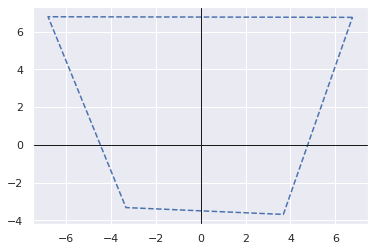

In [ ]:
X=[6.757715,	-6.789982,	-3.321787,	3.684406, 6.757715]
Y=[6.757715,	6.789982,	-3.321787,	-3.684406, 6.757715]
plt.plot(X,Y,linestyle='--')
plt.axhline(y=0, color='k', linestyle='-', linewidth=1)           
plt.axvline(x=0, color='k',linestyle='-', linewidth=1) 
plt.show()


PCA


In [ ]:
 df_pca['Clusters'] = predictions

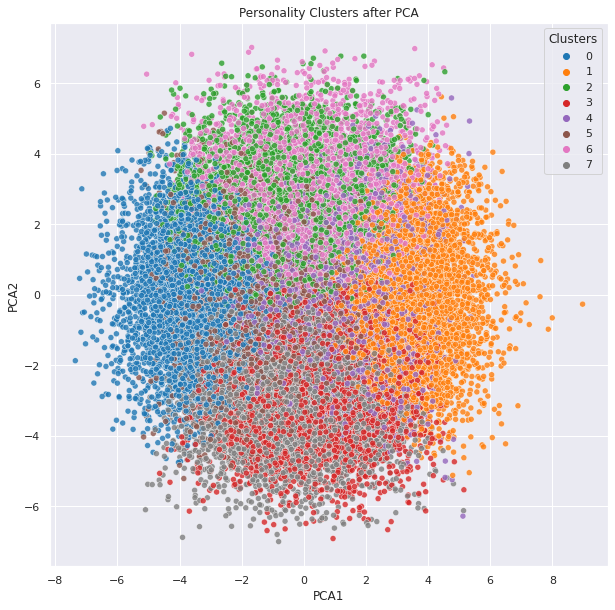

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Clusters', palette='tab10', alpha=0.8)
plt.title('');

In [ ]:
# for i in range(0,clus-1):
#   for j in range(i+1,clus):
#     data3=data2[data2['Clusters']==i]
#     data3=data3.append(data2[data2['Clusters']==j])
#     pca = PCA(n_components=2)
#     pca_fit = pca.fit_transform(data3)
#     df_pca1 = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2'])
#     x=np.array(data3['Clusters'])
#     df_pca1['Clusters']=x
#     plt.figure(figsize=(10,10))
#     sns.scatterplot(data=df_pca1, x='PCA1', y='PCA2', hue='Clusters', palette='tab10', alpha=0.8)
#     plt.title('Personality Clusters after PCA1');
    

    

In [ ]:

# test=[]
# temp=[]
# #for i in range(0,16):
# #  n=int(input())
# #  temp.append(n)
# temp=[1,2,0,3,1,2,2,3,1,0,2,3,0,2,2,0]
# test.append(temp)
# X=pd.DataFrame(test,columns=['A', 'B', 'C','D','E','F','G','H','I','J','K','L','M','N','O','P'])


In [ ]:

# X

In [ ]:
# X["Topic1"]=X["A"]+X["B"]+X["C"]+X["D"]
# X["Topic2"]=X["E"]+X["F"]+X["G"]+X["H"]
# X["Topic3"]=X["I"]+X["J"]+X["L"]+X["K"]
# X["Topic4"]=X["M"]+X["N"]+X["O"]+X["P"]
# X



In [ ]:
# X_test=X[["Topic1","Topic2","Topic3","Topic4"]].copy()
# X_test

In [ ]:
test=[[0.831,0.213,0.723,0.755]]
X_test=pd.DataFrame(test,columns=["Topic1","Topic2","Topic3","Topic4"])
X_test.shape

(1, 4)

In [ ]:

test_labels = kmeans.predict(X_test)
X_test_clstrs = X_test.copy()
X_test_clstrs['Cluster'] = test_labels

print(X_test_clstrs)
print(newdf)


   Topic1  Topic2  Topic3  Topic4  Cluster
0   0.831   0.213   0.723   0.755        6
     Topic1    Topic2    Topic3    Topic4  Clusters        sum
0  6.757715  6.789982  3.321787  3.684406       0.0  20.553890
1  3.277633  3.163888  6.642634  6.406373       1.0  19.490528
2  3.257980  6.594848  3.499410  6.797717       2.0  20.149956
3  6.714186  3.430304  6.609263  3.258225       3.0  20.011978
4  6.567163  3.216910  3.426196  6.707613       4.0  19.917882
5  3.353320  6.633752  6.573008  3.241255       5.0  19.801335
6  3.448282  3.557492  3.157773  3.282867       6.0  13.446414
7  6.540506  6.532116  6.846182  6.704155       7.0  26.622959


In [ ]:
X_test_clstrs.shape

(1, 5)

In [ ]:
newdf.loc[[1]].shape

(1, 6)